<a href="https://colab.research.google.com/github/lbovet8/phys152-2026/blob/main/Projects/HiggsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
#from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

import xgboost
from xgboost import XGBClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load data
data = pd.read_csv('/content/drive/My Drive/ML_Project/HIGGS.csv.gz')

In [3]:
# first column is label, all columns after are features
y = data.iloc[:, 0].values
X = data.iloc[:, 1:].values

# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# separate features into low and high level
X_train_low = X_train[:, :21]
X_test_low = X_test[:, :21]

#X_train_high = X_train[:, 21:]
#X_test_high = X_test[:, 21:]

In [4]:
print(f"Total Dataset: {len(data)}")

print(f"Training all features shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing all features shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

print(f"Training low features shape: {X_train_low.shape}")
print(f"Testing low features shape: {X_test_low.shape}")

Total Dataset: 10999999
Training all features shape: (8799999, 28), Training labels shape: (8799999,)
Testing all features shape: (2200000, 28), Testing labels shape: (2200000,)
Training low features shape: (8799999, 21)
Testing low features shape: (2200000, 21)


# Visualization of features for both labels

In [5]:
# Take a look at data
print(y_train[0])
print(y_train[3])
print(len(X_train[0]))
print(X_train[0])
print(X_train[0][0])

0.0
1.0
28
[ 0.37077641  2.13001561 -0.19444239  0.24796259  0.10643989  0.63529605
 -1.6230123   1.01799393  0.          1.41200769  1.37649679  1.44023764
  0.          1.71388853 -0.33934987 -0.86614174  0.          1.39569664
  0.28769615 -0.48858672  3.10196137  2.25203609  1.58605218  0.99725837
  0.54030633  0.46727264  1.1294384   0.99767011]
0.3707764148712158


In [6]:
def plot_one_feature(training_input_data, training_output_data, feature_int):
  # accessing data with correct labels and desired feature
  x_data_label_0 = []
  x_data_label_1 = []
  for i in range(len(training_output_data)):
    if training_output_data[i] == 0.0:
      x_data_label_0.append(training_input_data[i][feature_int])
    elif training_output_data[i] == 1.0:
      x_data_label_1.append(training_input_data[i][feature_int])

  # Plot
  plt.figure(figsize=(6, 4))
  plt.hist(x_data_label_0, bins=50, alpha=0.5, color='pink', label='Background')
  plt.hist(x_data_label_1, bins = 50, alpha=0.5, color='purple', label='Signal')
  plt.xlabel('Value of Feature')
  plt.ylabel('Number of Events')
  plt.legend()
  plt.title(f"Feature Nr. {feature_int}")
  plt.show()

In [7]:
def plot_all_features(training_input_data, training_output_data):

    fig, axes = plt.subplots(7, 4, figsize=(16, 21))
    axes = axes.flatten()

    for feature_int in range(28):
        x_data_label_0 = []
        x_data_label_1 = []

        for i in range(len(training_output_data)):
          if training_output_data[i] == 0.0:
            x_data_label_0.append(training_input_data[i][feature_int])
          elif training_output_data[i] == 1.0:
            x_data_label_1.append(training_input_data[i][feature_int])

        axes[feature_int].hist(x_data_label_0, bins=50, alpha=0.5, color='pink', label='Background')
        axes[feature_int].hist(x_data_label_1, bins=50, alpha=0.5, color='purple', label='Signal')

        axes[feature_int].set_title(f"Feature {feature_int}")
        axes[feature_int].tick_params(labelsize=8)

    plt.tight_layout()
    fig.supxlabel("Feature Value", fontsize=14)
    fig.supylabel("Number of Events", fontsize=14)
    plt.show()



In [8]:
#plot_one_feature(X_train, y_train, 0)

In [9]:
#plot_all_features(X_train, y_train)


I am surprised how many signals we have here. They are as many as the background or even larger.

# Implement Decision Tree

In [16]:
N_ESTIMATORS = 500
MAX_DEPTH = 4
LEARNING_RATE_DT = 0.05
OBJECTIVE = 'binary:logistic'

In [17]:
xgbclf_high = XGBClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, learning_rate=LEARNING_RATE_DT, objective=OBJECTIVE)
# fit model
xgbclf_high.fit(X_train, y_train)
# make predictions
#preds = xgbclf_high.predict(X_test)
xgbclf_high.score(X_train,y_train), xgbclf_high.score(X_test,y_test)

print(f'Parameters used for all features: {xgbclf_high.get_params()}.')

Parameters used for all features: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 500, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}.


In [18]:
xgbclf_low = XGBClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, learning_rate=LEARNING_RATE_DT, objective=OBJECTIVE)
# fit model
xgbclf_low.fit(X_train_low, y_train)
# make predictions
#preds = xgbclf_high.predict(X_test)
xgbclf_low.score(X_train_low, y_train), xgbclf_low.score(X_test_low,y_test)

print(f'Parameters used for low features: {xgbclf_low.get_params()}.')

Parameters used for low features: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 500, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}.


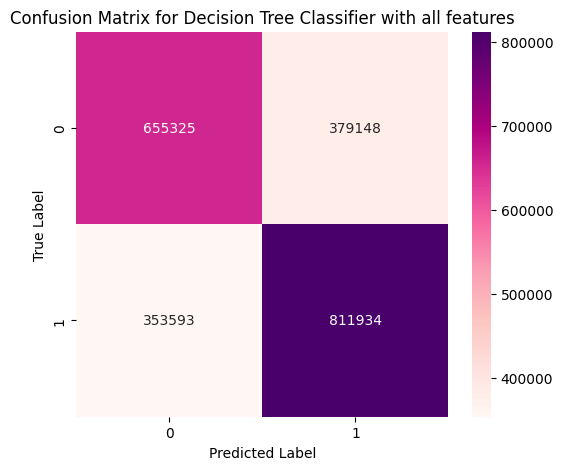

In [13]:
# Get predictions from the DecisionTreeClassifier on the test set
y_pred_xgbclf_high = xgbclf_high.predict(X_test)

# Create confusion matrix for Decision Tree
cm_xgbclf_high = confusion_matrix(y_test, y_pred_xgbclf_high)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgbclf_high, annot=True, fmt='d', cmap='RdPu')
plt.title('Confusion Matrix for Decision Tree Classifier with all features')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

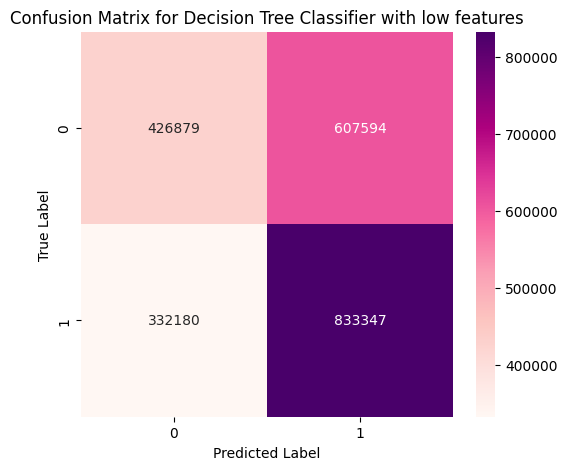

In [14]:
# Get predictions from the DecisionTreeClassifier on the test set
y_pred_xgbclf_low = xgbclf_low.predict(X_test_low)

# Create confusion matrix for Decision Tree
cm_xgbclf_low = confusion_matrix(y_test, y_pred_xgbclf_low)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgbclf_low, annot=True, fmt='d', cmap='RdPu')
plt.title('Confusion Matrix for Decision Tree Classifier with low features')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

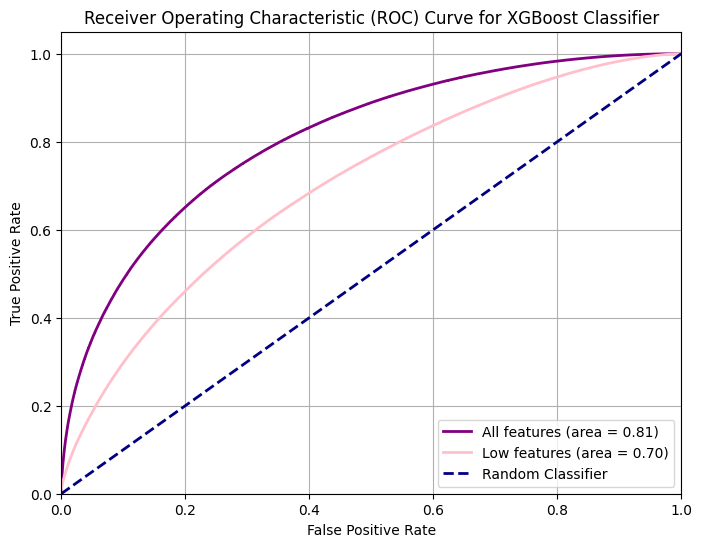

In [19]:
# Get predicted probabilities for the positive class
y_pred_proba_xgbclf_high = xgbclf_high.predict_proba(X_test)[:, 1]
y_pred_proba_xgbclf_low = xgbclf_low.predict_proba(X_test_low)[:, 1]

# Calculate ROC curve
fpr_high, tpr_high, thresholds_high = roc_curve(y_test, y_pred_proba_xgbclf_high)
roc_auc_high = auc(fpr_high, tpr_high)

fpr_low, tpr_low, thresholds_low = roc_curve(y_test, y_pred_proba_xgbclf_low)
roc_auc_low = auc(fpr_low, tpr_low)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_high, tpr_high, color='purple', lw=2, label=f'All features (area = {roc_auc_high:.2f})')
plt.plot(fpr_low, tpr_low, color='pink', lw=2, label=f'Low features (area = {roc_auc_low:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Implement DNN

In [22]:
# use Dataloader
# normalize the input features to be within (0,1)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_train_low = torch.FloatTensor(X_train_low)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
X_test_low = torch.FloatTensor(X_test_low)
y_test = torch.LongTensor(y_test)

# create TensorDataset
train_dataset_high = TensorDataset(X_train, y_train)
test_dataset_high = TensorDataset(X_test, y_test)
train_dataset_low = TensorDataset(X_train_low, y_train)
test_dataset_low = TensorDataset(X_test_low, y_test)

# create PyTorch DataLoader with batches for training
train_loader_high = DataLoader(
    train_dataset_high,
    batch_size=16,      # Adjust based on your needs
    shuffle=True        # Shuffle training data in batches
)

test_loader_high = DataLoader(
    test_dataset_high,
    batch_size=16,
    shuffle=False       # Don't shuffle test data
)

train_loader_low = DataLoader(
    train_dataset_low,
    batch_size=16,      # Adjust based on your needs
    shuffle=True        # Shuffle training data in batches
)

test_loader_low = DataLoader(
    test_dataset_low,
    batch_size=16,
    shuffle=False       # Don't shuffle test data
)

#print(f"Training samples all features: {len(train_dataset_high)}")
#print(f"Training samples low features: {len(train_dataset_low)}")
#print(f"Test samples all features: {len(test_dataset_high)}")
#print(f"Test samples low features: {len(test_dataset_low)}")
#print(f"Batches per epoch: {len(train_loader)}")

Training samples all features: 8799999
Training samples low features: 8799999
Test samples all features: 2200000
Test samples low features: 2200000


In [26]:
# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [28]:
class HiggsDNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Create model for low features
model_low = HiggsDNN(input_size=21, hidden_size=50)
model_low = model_low.to(device)
print(model_low)
print(f"\nTotal parameters: {sum(p.numel() for p in model_low.parameters()):,}")

# Create model for all features
model_high = HiggsDNN(input_size=28, hidden_size=50)
model_high = model_high.to(device)
print(model_high)
print(f"\nTotal parameters: {sum(p.numel() for p in model_high.parameters()):,}")

HiggsDNN(
  (model): Sequential(
    (0): Linear(in_features=21, out_features=50, bias=True)
    (1): Tanh()
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): Tanh()
    (4): Linear(in_features=50, out_features=50, bias=True)
    (5): Tanh()
    (6): Linear(in_features=50, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

Total parameters: 6,251
HiggsDNN(
  (model): Sequential(
    (0): Linear(in_features=28, out_features=50, bias=True)
    (1): Tanh()
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): Tanh()
    (4): Linear(in_features=50, out_features=50, bias=True)
    (5): Tanh()
    (6): Linear(in_features=50, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

Total parameters: 6,601


In [32]:
# define training
criterion = nn.BCELoss()
optimizer = optim.SGD(model_low.parameters(), lr=0.1, momentum=0.9)

num_epochs = 100

# training loop
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader_low):
        data = data.to(device)
        target = target.view(-1, 1).float().to(device)

        optimizer.zero_grad()
        output = model_low(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

NameError: name 'num_epochs' is not defined

In [ ]:
# Set the model to evaluation mode
model_low.eval()

all_labels_low = []
all_predictions_low = []

# Disable gradient calculations for inference
with torch.no_grad():
    for data, target in testing_loader_low:
        data, target = data.to(device), target.to(device)
        output = model_low(data)
        all_predictions_low.extend(output.cpu().numpy())
        all_labels_low.extend(target.cpu().numpy())

# Convert lists to numpy arrays
y_true_low = np.array(all_labels_low)
y_pred_proba_low = np.array(all_predictions_low)

# For binary classification with Sigmoid, output is already probability, but ensure shape is correct
# y_pred_proba will be (N, 1), we need (N,) for roc_curve
y_pred_proba_low = y_pred_proba_low.flatten()
y_true_low = y_true_low.flatten()

# Convert probabilities to binary predictions for accuracy calculation (e.g., threshold at 0.5)
y_pred_binary_low = (y_pred_proba_low > 0.5).astype(int)

# Calculate Accuracy
accuracy_low = accuracy_score(y_true_low, y_pred_binary_low)
print(f"Accuracy on testing data: {accuracy_low:.4f}")

# Calculate ROC curve
fpr_low, tpr_low, thresholds_low = roc_curve(y_true_low, y_pred_proba_low)
roc_auc_low = auc(fpr_low, tpr_low)

#print("Thresholds (first 10):", thresholds[:10]) # Print first 10 thresholds, not all

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_low, tpr_low, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Deep Neural Network (Training Data)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()